### Main file

In [1]:
import numpy as np 
from tools.srbm_mnist import *           
from tools.functions import *
import matplotlib.pyplot as plt

date_str = str(datetime.datetime.now())[0:10]
date_time_str = str(datetime.datetime.now())[0:10]+"_"+str(datetime.datetime.now())[11:16]

In [2]:
# A smaller version of the MNIST dataset is used with 5000 training samples and 1000 test samples
# The data tuple contains an input vector sequence for the data and the labels with its size depending on the training duration as well as the original train and test data sets. 
# The input vector sequence is a sequence of data selected to have an equal amount of each class. 

Id = create_Id(N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, beta = beta_parameter, n_samples=n_samples)
W, b_v, b_c, b_h = create_rbm_parameters(N_v = N_v, N_c = N_c, N_h = N_h)
mnist_data = load_mnist_data(n_samples = n_samples, min_p = .00001, max_p = .98, binary = True, seed=0)

In [3]:
loc = main(W, b_v, b_c, b_h, Id = Id, dorun = True, monitors = True, mnist_data=mnist_data) # changed from create_Id to Id

WARNING    Removing unsupported flag '-march=native' from compiler flags. [brian2.codegen.cpp_prefs]


Train accuracy: 0.145
Test accuracy: 0.098
Train accuracy: 0.09
Test accuracy: 0.098
Train accuracy: 0.09
Test accuracy: 0.124
Train accuracy: 0.09
Test accuracy: 0.101
Train accuracy: 0.105
Test accuracy: 0.127
Train accuracy: 0.25
Test accuracy: 0.272
Train accuracy: 0.195
Test accuracy: 0.2
Train accuracy: 0.095
Test accuracy: 0.12
Train accuracy: 0.23
Test accuracy: 0.257
Train accuracy: 0.335
Test accuracy: 0.307
Train accuracy: 0.285
Test accuracy: 0.255
Train accuracy: 0.305
Test accuracy: 0.249
Train accuracy: 0.37
Test accuracy: 0.362
Train accuracy: 0.375
Test accuracy: 0.418
Train accuracy: 0.385
Test accuracy: 0.411
Train accuracy: 0.34
Test accuracy: 0.353
Train accuracy: 0.465
Test accuracy: 0.461
Train accuracy: 0.405
Test accuracy: 0.45
Train accuracy: 0.5
Test accuracy: 0.526
Train accuracy: 0.54
Test accuracy: 0.516
Train accuracy: 0.49
Test accuracy: 0.501
Train accuracy: 0.45
Test accuracy: 0.492
Train accuracy: 0.55
Test accuracy: 0.574
Train accuracy: 0.57
Test ac

In [4]:
locals().update(loc)

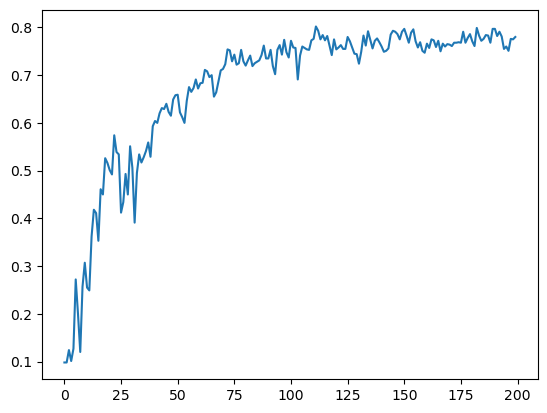

In [5]:
plot(res_hist_test)
plt.show()

In [6]:
# Why does beta get replaced by the numpy function??
W = np.array(Srs.w).reshape(N_v+N_c, N_h)*beta_parameter
Wvh=W[:N_v,:]
Wch=W[N_v:,:]
mBv = np.array(Sbv.w)*beta_parameter*tau_rec*bias_input_rate
mBh = np.array(Sbh.w)*beta_parameter*tau_rec*bias_input_rate
b_c = mBv[N_v:(N_v+N_c)]
b_v = mBv[:N_v]
b_h = mBh
mB = np.concatenate([mBv,mBh])

In [7]:
path = "output_mnist/"
save_matrices(W, Wvh, Wch, mBv, mBh, b_c, b_v, b_h, mB, date_str, date_time_str, path = path)

Matrices saved to output/output_mnist/2023-04-19/14-19
